<a href="https://colab.research.google.com/github/Sanchari0305/latent-diffusion-text-to-image/blob/main/LATENT_DIFFUSION_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
print("GPU available:", torch.cuda.is_available())
print("GPU name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")


GPU available: True
GPU name: Tesla T4


In [2]:
!pip install torch torchvision matplotlib tqdm

In [3]:
!pip install transformers

In [4]:
import torch
import torchvision
import matplotlib.pyplot as plt
from tqdm import tqdm

print("Torch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())


Torch version: 2.9.0+cu126
CUDA available: True


100%|██████████| 170M/170M [00:03<00:00, 48.9MB/s]


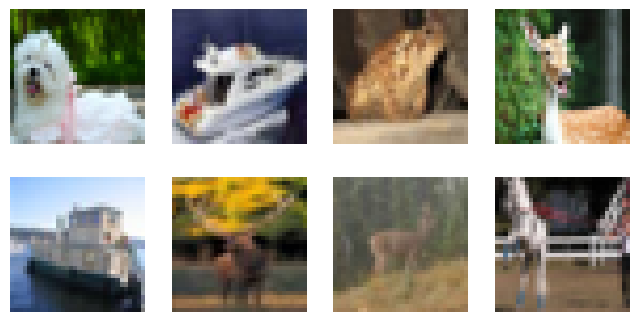

In [5]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# Transform images to tensors (numbers)
transform = transforms.Compose([
    transforms.ToTensor()
])

# Load dataset
dataset = datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

# DataLoader (feeds data to model)
loader = DataLoader(dataset, batch_size=8, shuffle=True)

# Get one batch
images, labels = next(iter(loader))

# Show images
plt.figure(figsize=(8,4))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(np.transpose(images[i], (1,2,0)))
    plt.axis('off')

plt.show()


In [6]:
import torch
import torch.nn as nn

class VAE(nn.Module):
    def __init__(self, latent_dim=64):
        super().__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, 4, 2, 1),  # 32x32 → 16x16
            nn.ReLU(),
            nn.Conv2d(32, 64, 4, 2, 1), # 16x16 → 8x8
            nn.ReLU()
        )

        self.fc_mu = nn.Linear(64 * 8 * 8, latent_dim)
        self.fc_dec = nn.Linear(latent_dim, 64 * 8 * 8)

        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 4, 2, 1), # 8x8 → 16x16
            nn.ReLU(),
            nn.ConvTranspose2d(32, 3, 4, 2, 1),  # 16x16 → 32x32
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = x.view(x.size(0), -1)
        z = self.fc_mu(x)
        x = self.fc_dec(z)
        x = x.view(-1, 64, 8, 8)
        return self.decoder(x)


In [7]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model = VAE().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.MSELoss()

epochs = 20

for epoch in range(epochs):
    total_loss = 0
    for images, _ in loader:
        images = images.to(device)

        outputs = model(images)
        loss = loss_fn(outputs, images)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(loader):.4f}")


Epoch [1/20], Loss: 0.0107
Epoch [2/20], Loss: 0.0083
Epoch [3/20], Loss: 0.0080
Epoch [4/20], Loss: 0.0079
Epoch [5/20], Loss: 0.0079
Epoch [6/20], Loss: 0.0078
Epoch [7/20], Loss: 0.0078
Epoch [8/20], Loss: 0.0077
Epoch [9/20], Loss: 0.0077
Epoch [10/20], Loss: 0.0077
Epoch [11/20], Loss: 0.0077
Epoch [12/20], Loss: 0.0077
Epoch [13/20], Loss: 0.0076
Epoch [14/20], Loss: 0.0076
Epoch [15/20], Loss: 0.0076
Epoch [16/20], Loss: 0.0076
Epoch [17/20], Loss: 0.0076
Epoch [18/20], Loss: 0.0076
Epoch [19/20], Loss: 0.0076
Epoch [20/20], Loss: 0.0076


In [8]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model = VAE().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.MSELoss()

epochs = 20

for epoch in range(epochs):
    total_loss = 0
    for images, _ in loader:
        images = images.to(device)

        outputs = model(images)
        loss = loss_fn(outputs, images)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(loader):.4f}")


Epoch [1/20], Loss: 0.0108
Epoch [2/20], Loss: 0.0083
Epoch [3/20], Loss: 0.0081
Epoch [4/20], Loss: 0.0080
Epoch [5/20], Loss: 0.0079
Epoch [6/20], Loss: 0.0078
Epoch [7/20], Loss: 0.0078
Epoch [8/20], Loss: 0.0077
Epoch [9/20], Loss: 0.0077
Epoch [10/20], Loss: 0.0077
Epoch [11/20], Loss: 0.0077
Epoch [12/20], Loss: 0.0077
Epoch [13/20], Loss: 0.0077
Epoch [14/20], Loss: 0.0076
Epoch [15/20], Loss: 0.0076
Epoch [16/20], Loss: 0.0076
Epoch [17/20], Loss: 0.0076
Epoch [18/20], Loss: 0.0076
Epoch [19/20], Loss: 0.0076
Epoch [20/20], Loss: 0.0076


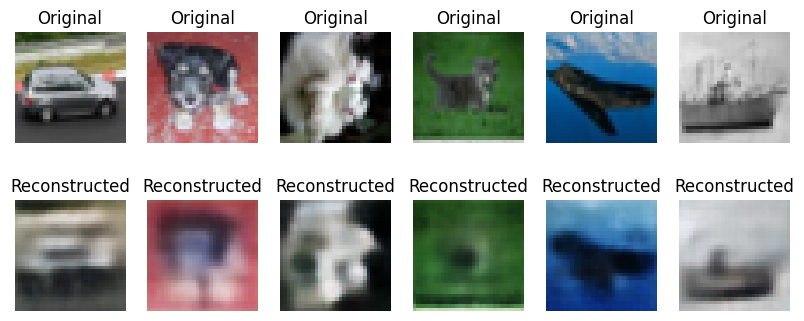

In [9]:
model.eval()

with torch.no_grad():
    images, _ = next(iter(loader))
    images = images.to(device)
    recon = model(images)

# Plot original vs reconstructed
plt.figure(figsize=(10,4))
for i in range(6):
    # Original
    plt.subplot(2,6,i+1)
    plt.imshow(images[i].cpu().permute(1,2,0))
    plt.title("Original")
    plt.axis("off")

    # Reconstructed
    plt.subplot(2,6,i+7)
    plt.imshow(recon[i].cpu().permute(1,2,0))
    plt.title("Reconstructed")
    plt.axis("off")

plt.show()


In [10]:
torch.save(model.state_dict(), "vae.pth")
print("VAE saved successfully!")


VAE saved successfully!


## **DIFFUSION — THE HEART OF GEN-AI**

In [11]:
# Freeze VAE parameters
for param in model.parameters():
    param.requires_grad = False

model.eval()
print("VAE frozen and ready for diffusion.")


VAE frozen and ready for diffusion.


In [12]:
import torch

timesteps = 100

betas = torch.linspace(1e-4, 0.02, timesteps)
alphas = 1. - betas
alpha_bars = torch.cumprod(alphas, dim=0)


In [13]:
def add_noise(latent, t):
    noise = torch.randn_like(latent)
    sqrt_alpha_bar = torch.sqrt(alpha_bars[t]).to(latent.device)
    sqrt_one_minus = torch.sqrt(1 - alpha_bars[t]).to(latent.device)
    return sqrt_alpha_bar * latent + sqrt_one_minus * noise, noise


In [21]:
class TextDenoiser(nn.Module):
    def __init__(self, latent_dim=64, text_dim=512):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(latent_dim + text_dim, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, latent_dim)
        )

    def forward(self, z, text_emb):
        x = torch.cat([z, text_emb], dim=1)
        return self.net(x)


In [22]:
def get_latents(images):
    with torch.no_grad():
        x = model.encoder(images)
        x = x.view(x.size(0), -1)
        z = model.fc_mu(x)
    return z


In [25]:
from transformers import CLIPTokenizer, CLIPTextModel

tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-base-patch32")
text_encoder = CLIPTextModel.from_pretrained("openai/clip-vit-base-patch32").to(device)

text_encoder.eval()
print("CLIP text encoder loaded")

@torch.no_grad()
def get_text_embedding(prompt):
    tokens = tokenizer(
        prompt,
        return_tensors="pt",
        padding=True,
        truncation=True
    ).to(device)

    embedding = text_encoder(**tokens).last_hidden_state.mean(dim=1)
    return embedding

denoise_model = TextDenoiser().to(device)
optimizer = torch.optim.Adam(denoise_model.parameters(), lr=1e-3)
loss_fn = nn.MSELoss()

epochs = 15

prompts = [
    "a red car",
    "a blue car",
    "a green car",
    "a yellow car",
    "a truck",
    "a boat",
    "an airplane",
    "a dog",
    "a cat",
    "a horse"
]

for epoch in range(epochs):
    total_loss = 0
    for images, _ in loader:
        images = images.to(device)

        latents = get_latents(images)

        prompt = prompts[torch.randint(0, len(prompts), (1,)).item()]
        text_emb = get_text_embedding(prompt).repeat(latents.size(0), 1)

        t = torch.randint(0, timesteps, (1,)).item()
        noisy_latents, noise = add_noise(latents, t)

        pred_noise = denoise_model(noisy_latents, text_emb)
        loss = loss_fn(pred_noise, noise)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}] Text-Diffusion Loss: {total_loss/len(loader):.4f}")

CLIP text encoder loaded
Epoch [1/15] Text-Diffusion Loss: 0.7010
Epoch [2/15] Text-Diffusion Loss: 0.6188
Epoch [3/15] Text-Diffusion Loss: 0.6186
Epoch [4/15] Text-Diffusion Loss: 0.6113
Epoch [5/15] Text-Diffusion Loss: 0.6169
Epoch [6/15] Text-Diffusion Loss: 0.6069
Epoch [7/15] Text-Diffusion Loss: 0.6071
Epoch [8/15] Text-Diffusion Loss: 0.6061
Epoch [9/15] Text-Diffusion Loss: 0.6050
Epoch [10/15] Text-Diffusion Loss: 0.6044
Epoch [11/15] Text-Diffusion Loss: 0.6005
Epoch [12/15] Text-Diffusion Loss: 0.5987
Epoch [13/15] Text-Diffusion Loss: 0.5960
Epoch [14/15] Text-Diffusion Loss: 0.5992
Epoch [15/15] Text-Diffusion Loss: 0.6012


In [26]:
torch.save(denoise_model.state_dict(), "diffusion.pth")
print("Diffusion model saved!")


Diffusion model saved!


In [38]:
@torch.no_grad()
def sample_text_latent(prompt, steps=100, latent_dim=64):
    z = torch.randn(1, latent_dim).to(device)
    text_emb = get_text_embedding(prompt)

    for t in reversed(range(steps)):
        pred_noise = denoise_model(z, text_emb)
        z = (z - torch.sqrt(1 - alphas[t]) * pred_noise) / torch.sqrt(alphas[t])

    return z


In [39]:
@torch.no_grad()
def decode_latent(z):
    x = model.fc_dec(z)
    x = x.view(-1, 64, 8, 8)
    img = model.decoder(x)
    return img

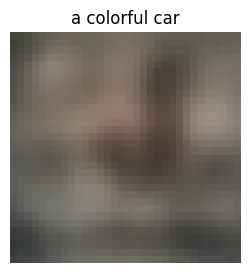

In [40]:
prompt = "a colorful car"
latent = sample_latent(prompt)
generated_img = decode_latent(latent)

plt.figure(figsize=(3,3))
plt.imshow(generated_img[0].cpu().permute(1,2,0))
plt.axis("off")
plt.title(prompt)
plt.show()


In [34]:
from transformers import CLIPTokenizer, CLIPTextModel

tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-base-patch32")
text_encoder = CLIPTextModel.from_pretrained("openai/clip-vit-base-patch32").to(device)

text_encoder.eval()
print("CLIP text encoder loaded")

CLIP text encoder loaded


In [35]:
@torch.no_grad()
def get_text_embedding(prompt):
    tokens = tokenizer(
        prompt,
        return_tensors="pt",
        padding=True,
        truncation=True
    ).to(device)

    embedding = text_encoder(**tokens).last_hidden_state.mean(dim=1)
    return embedding


In [36]:
@torch.no_grad()
def sample_text_image(prompt, steps=100):
    z = torch.randn(1, 64).to(device)
    text_emb = get_text_embedding(prompt)

    for t in reversed(range(steps)):
        pred_noise = denoise_model(z, text_emb)
        z = (z - torch.sqrt(1 - alphas[t]) * pred_noise) / torch.sqrt(alphas[t])

    img = decode_latent(z)
    return img


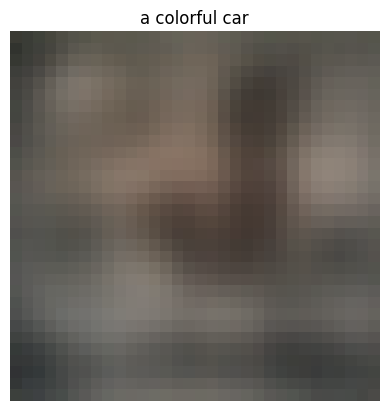

In [37]:
prompt = "a colorful car"
img = sample_text_image(prompt)

plt.imshow(img[0].cpu().permute(1,2,0))
plt.title(prompt)
plt.axis("off")
plt.show()


In [41]:
plt.imsave("sample_output.png",
           generated_img[0].cpu().permute(1,2,0).numpy())


In [42]:
from google.colab import files

files.download("vae.pth")
files.download("diffusion.pth")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
import os

if os.path.exists("/content/drive/MyDrive/vae.pth"):
    model.load_state_dict(torch.load("/content/drive/MyDrive/vae.pth"))
    print("VAE loaded")
else:
    print("Train VAE")

if os.path.exists("/content/drive/MyDrive/diffusion.pth"):
    denoise_model.load_state_dict(torch.load("/content/drive/MyDrive/diffusion.pth"))
    print("Diffusion loaded")
else:
    print("Train diffusion")


Train VAE
Train diffusion
